In [ ]:
import pandas as pd
import seaborn as sns

<Axes: xlabel='Droplet Volume', ylabel='Contact Angle (Circle Fit)'>

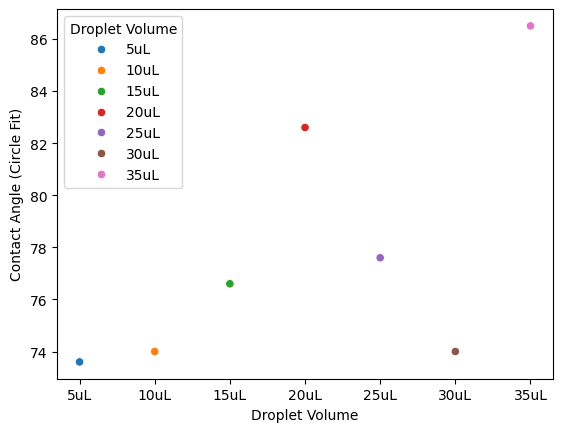

In [138]:
contact_calibration_df = pd.read_csv('/Users/yitongtseo/Documents/GitHub/ethical_necromancy/droplet_angles/contact_angle_12_09_24_calibration.csv', comment="#")

contact_calibration_df['Contact Angle (Circle Fit)'] = 180 - contact_calibration_df['Theta_C'] 
contact_calibration_df['Contact Angle (Ellipse Fit)'] = 180 - contact_calibration_df['Theta_E'] 
contact_calibration_df['Droplet Volume'] = contact_calibration_df['File_Name'] 
sns.scatterplot(contact_calibration_df, y= 'Contact Angle (Circle Fit)', x='Droplet Volume', hue='Droplet Volume')

In [129]:
contact_df = pd.read_csv('/Users/yitongtseo/Documents/GitHub/ethical_necromancy/droplet_angles/contact_angle_12_09_24.csv', comment="#")

In [130]:
contact_df['Day IPTG Was Added'] = contact_df['File_Name'].apply(lambda x: x.split('_')[0])
contact_df['replicate'] = contact_df['File_Name'].apply(lambda x: x.split('_')[1])
contact_df['Contact Angle (Circle Fit)'] = 180 - contact_df['Theta_C'] 
contact_df['Contact Angle (Ellipse Fit)'] = 180 - contact_df['Theta_E'] 

In [131]:
contact_df

,File_Name,Angle,Length,Theta_C,Uncertainty,Theta_Left,Theta_Right,Theta_E,Radius,Cricle_StDev,Ellipse_StDev,e,Points,Volume,Day IPTG Was Added,replicate,Contact Angle (Circle Fit),Contact Angle (Ellipse Fit)
1,day9_3a.JPG,180.000000,447.000000,106.4,0.3,110.3,112.0,111.2,233.07,0.938848,0.001761,0.93,103,3.747841e+07,day9,3a.JPG,73.6,68.8
1,day9_3b.JPG,179.690296,555.008108,106.0,0.3,113.2,111.4,112.3,288.70,1.332298,0.006912,0.90,103,7.068640e+07,day9,3b.JPG,74.0,67.7
1,day9_3c.JPG,-178.939088,648.111102,103.4,0.4,111.3,109.6,110.4,333.13,1.651462,0.004885,0.89,103,1.037973e+08,day9,3c.JPG,76.6,69.6
1,day9_3d.JPG,180.000000,789.000000,97.4,0.5,108.6,107.2,107.9,397.88,2.540285,0.003507,0.84,103,1.571427e+08,day9,3d.JPG,82.6,72.1
1,day9_3e.JPG,-179.781315,786.005725,102.4,0.6,114.2,111.8,113.0,402.56,3.198527,0.003356,0.84,103,1.799973e+08,day9,3e.JPG,77.6,67.0
1,day9_3f.JPG,179.716360,808.009901,106.0,0.4,113.4,112.9,113.2,419.82,2.242770,0.001829,0.89,103,2.173035e+08,day9,3f.JPG,74.0,66.8
1,day9_3g.JPG,179.823706,975.004615,93.5,0.4,103.2,101.7,102.4,488.52,2.509457,0.003371,0.85,103,2.662665e+08,day9,3g.JPG,86.5,77.6


In [132]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

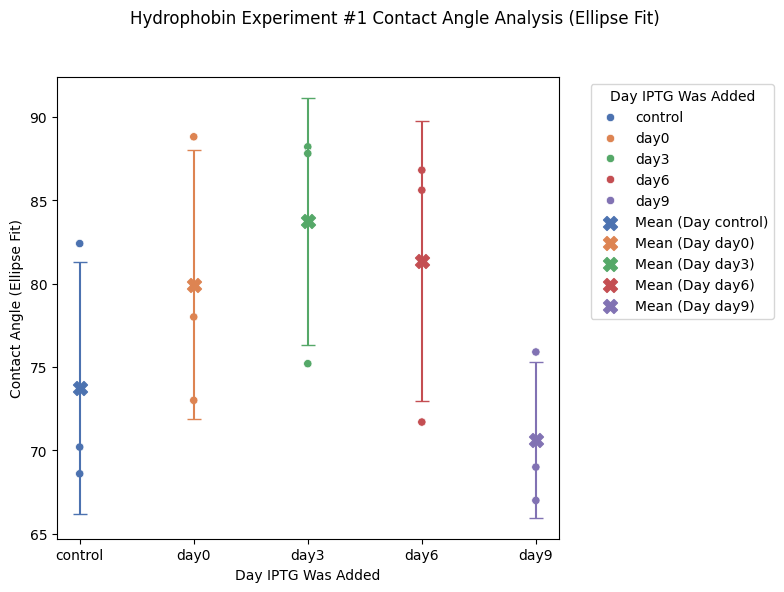

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Calculate means and standard deviations
stats = (
    contact_df.groupby("Day IPTG Was Added")["Contact Angle (Ellipse Fit)"]
    .agg(["mean", "std"])
    .reset_index()
)

# Set up the color palette
palette = sns.color_palette("deep", n_colors=contact_df["Day IPTG Was Added"].nunique())
color_mapping = dict(zip(stats["Day IPTG Was Added"], palette))

# Create scatterplot
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=contact_df,
    y="Contact Angle (Ellipse Fit)",
    x="Day IPTG Was Added",
    hue="Day IPTG Was Added",
    palette=palette,
)

# Add "T" standard deviation marks and mean markers
for _, row in stats.iterrows():
    plt.errorbar(
        x=row["Day IPTG Was Added"],
        y=row["mean"],
        yerr=row["std"],
        fmt="none",
        ecolor=color_mapping[row["Day IPTG Was Added"]],  # Color by hue
        capsize=5,
    )
    plt.scatter(
        row["Day IPTG Was Added"],
        row["mean"],
        color=color_mapping[row["Day IPTG Was Added"]],
        # edgecolor='black',
        marker="X",
        s=100,
        label=f"Mean (Day {row['Day IPTG Was Added']})",  # Use string directly
    )

# Adjust legend position
plt.legend(title="Day IPTG Was Added", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add a big title
plt.suptitle(
    "Contact Angle Analysis Over Days IPTG Was Added",
    fontsize=16,
    weight="bold",
    y=1.02,
)

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave more space at the top

plt.suptitle("Hydrophobin Experiment #1 Contact Angle Analysis (Ellipse Fit)")
plt.show()